# Making sure our GPU is enabled (M1/M2) Silicon Valley 

https://github.com/jeffheaton/t81_558_deep_learning/blob/master/install/tensorflow-install-mac-metal-jan-2023.ipynb

In [1]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import keras
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-13.4.1-arm64-arm-64bit
Tensor Flow Version: 2.13.0-rc2
Keras Version: 2.13.1

Python 3.11.3 (main, Apr 19 2023, 18:49:55) [Clang 14.0.6 ]
Pandas 2.0.3
Scikit-Learn 1.3.0
GPU is available


In [2]:
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    print('GPU is available.')
else:
    print('No GPU detected.')

GPU is available.


# Importing Data & Dependecies 

We will be uisng the TensorFlow's fashion_mnist dataset which consists out of 10000 images originating from zalando's catalog. 
https://www.tensorflow.org/datasets/catalog/fashion_mnist 

In [3]:
#!pip install tensorflow-datasets

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [5]:
ds = tfds.load('fashion_mnist', split='train')  ## Using Tf datasets API 

2023-08-24 21:30:06.678606: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-08-24 21:30:06.678634: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-08-24 21:30:06.678638: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-08-24 21:30:06.678662: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-24 21:30:06.678674: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Visualizing our dataset 

In [6]:
import numpy as np ## Data transformation 

In [7]:
# Setting up our data connection aka iterator
dataiterator = ds.as_numpy_iterator()

In [8]:
# Getting data out of the pipeline/viewing samples 
dataiterator.next()['image']  ## label 

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

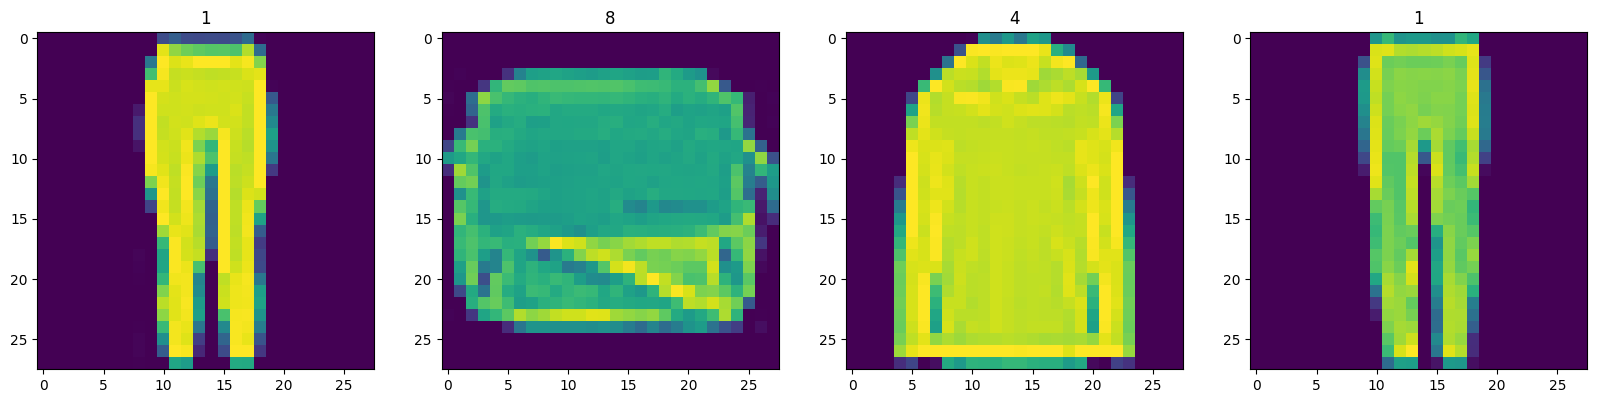

In [9]:
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx in range(4): 
    # Grab an image and label
    sample = dataiterator.next()
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(sample['image']))
    # Appending the image label as the plot title 
    ax[idx].title.set_text(sample['label'])

# Preproccessing our dataset/images 

In [11]:
# Creating a function to scale the images of our dataset input and return them in scaled version 

def scale_images(data):
    image = data['image']
    return image/255

**Building our DataPipeline**

In [12]:
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images) 
# Cache the dataset for that batch 
ds = ds.cache()
# Shuffle it up 
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(128)
# Reduces the likelihood of bottlenecking 
ds = ds.prefetch(64)

In [13]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# 1. Building our NN

**Bringing in the sequential api for the generator and discriminator**

In [14]:
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

**Building our Generator**